## Analisis de Temporadas de las principales ligas europeas

##### Se tiene una base de datos sql, donde se tienen tablas con información sobre las temporadas de las ligas europeas desde el 2009 al 2016 

In [1]:
#Librerias generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime as dt

In [3]:
#Visualizar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

In [4]:
#Ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

##### Para la lectura de datos desde sql, se usa la libreria sqlalchemy para su carga en python.

In [5]:
#Lectura de datos sql
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [6]:
#Pasos la lectura de la BD
engine = create_engine('sqlite:///database.sqlite') #engine database

### Carga de Datos

In [7]:
#Mostrar las tablas que existen dentro de la base de datos
inspector = inspect(engine)
schemas = inspector.get_schema_names()
for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        print(table_name)

schema: main
Country
League
Match
Player
Player_Attributes
Team
Team_Attributes
sqlite_sequence


In [8]:
#Carga de Datos
df_country = pd.read_sql_query('SELECT * FROM Country',engine)
df_league = pd.read_sql_query('SELECT * FROM League',engine)
df_match = pd.read_sql_query('SELECT * FROM Match',engine)
df_player = pd.read_sql_query('SELECT * FROM Player',engine)
df_player_attributes = pd.read_sql_query('SELECT * FROM Player_Attributes',engine)
df_team = pd.read_sql_query('SELECT * FROM Team',engine)
df_team_attributes = pd.read_sql_query('SELECT * FROM Team_Attributes',engine)

In [9]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [10]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Limpieza de datos

##### La tabla df_match es las mas grande y donde concentran las demas tablas, se borran columnas que no son relevantes para el estudia actual o por que no se tiene información sobre ellas

In [11]:
df_match_new = df_match.drop([ 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11','B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH',
       'BSD', 'BSA'],axis=1)

In [12]:
df_match_new

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,None,None,None,None,None,None,None,None
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,None,None,None,None,None,None,None,None
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,None,None,None,None,None,None,None,None
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,NaN,8881.0,173534.0,39646.0,282287.0,340790.0,393337.0,8893.0,614454.0,93229.0,178142.0,274776.0,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,None,None,None,None,None,None,None,None


In [13]:
df_match.columns.ravel()

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [14]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [15]:
df_player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [16]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [17]:
df_team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [18]:
df_player.query("player_api_id == 33272.0")

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
8546,8560,33272,Peter Jehle,18739,1982-01-22 00:00:00,187.96,176


In [19]:
df_team.query("team_api_id == 9824")

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
291,49122,9824,286.0,FC Vaduz,VAD


### Verificación de datos

##### Se comprueba que se requiere identificar la existencia de valores nulos y si corresponde aplicar relleno de datos o solo tratar a la columna como no relevante

In [20]:
df_match_new.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None


In [21]:
df_match_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   stage             25979 non-null  int64  
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   away_team_api_id  25979 non-null  int64  
 9   home_team_goal    25979 non-null  int64  
 10  away_team_goal    25979 non-null  int64  
 11  home_player_1     24755 non-null  float64
 12  home_player_2     24664 non-null  float64
 13  home_player_3     24698 non-null  float64
 14  home_player_4     24656 non-null  float64
 15  home_player_5     24663 non-null  float64
 16  home_player_6     24654 non-null  float6

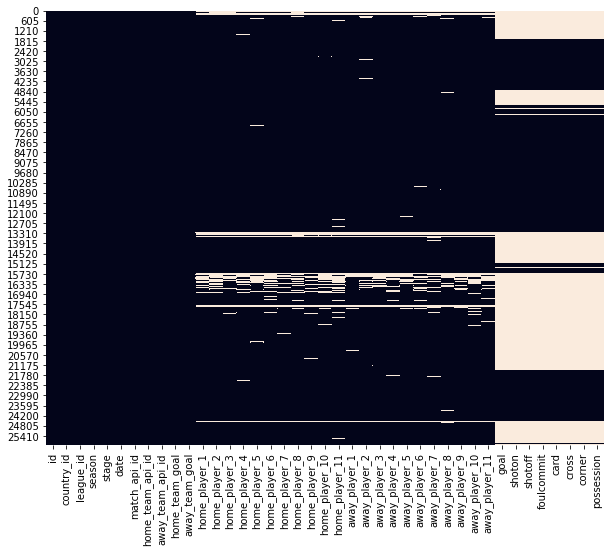

In [22]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_match_new.isnull(),cbar=False)
plt.show()

### Agrupamiento de datos

##### Como la base de datos es una relacional, se requiren hacer uniones entre ellas para condensar la información para analisis posteriores. Data_Master viene a ser la union entre la data de los partidos con los de los equipos

In [23]:
#Join entre data general y la de las ligas
data_master = pd.merge(df_match_new,df_league,left_on='country_id',right_on='id',how='left') 

In [24]:
#Join entre data general y datos de los equipos
data_master = pd.merge(data_master,df_team[['team_api_id','team_long_name']],left_on='home_team_api_id',right_on='team_api_id',how='left')

In [25]:
data_master.rename({'team_long_name':'home_team'},axis=1,inplace=True)

In [26]:
data_master = pd.merge(data_master,df_team[['team_api_id','team_long_name']],left_on='away_team_api_id',right_on='team_api_id',how='left')
data_master.rename({'team_long_name':'away_team'},axis=1,inplace=True)
data_master.rename({'name':'league'},axis=1,inplace=True)

In [27]:
data_master.drop(['id_y','country_id_y','team_api_id_x','team_api_id_y'],axis=1,inplace=True)

In [28]:
data_master.head(8)

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league,home_team,away_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Tubize,Royal Excel Mouscron


### Analisis de datos de las temporadas por liga

##### Al tener la bd final de los equipos y resultados, se proceder a transformar los datos para visualizar los ganadores de cada temporada y liga

In [29]:
#Se extraen las columnas que son de interes para determinar los clubes ganadores de cada temporada
data_season = data_master[['season','date','match_api_id','home_team_goal','away_team_goal','league','home_team','away_team']]

In [30]:
data_season.head()

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team
0,2008/2009,2008-08-17 00:00:00,492473,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2008/2009,2008-08-16 00:00:00,492474,0,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,2008/2009,2008-08-16 00:00:00,492475,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,2008/2009,2008-08-17 00:00:00,492476,5,0,Belgium Jupiler League,KAA Gent,RAEC Mons
4,2008/2009,2008-08-16 00:00:00,492477,1,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège


In [31]:
l = [int(x[-4:]) for x in data_season['season']]

In [32]:
data_season['year'] = l

In [33]:
data_season.head()

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team,year
0,2008/2009,2008-08-17 00:00:00,492473,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2009
1,2008/2009,2008-08-16 00:00:00,492474,0,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2009
2,2008/2009,2008-08-16 00:00:00,492475,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2009
3,2008/2009,2008-08-17 00:00:00,492476,5,0,Belgium Jupiler League,KAA Gent,RAEC Mons,2009
4,2008/2009,2008-08-16 00:00:00,492477,1,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2009


##### Para determinar los ganadores de cada temporada,se realiza un calculo para definir los puntos obtenidos en cada partido

In [34]:
#Clasificar los puntos por partido ganado
data_season.loc[(data_season['home_team_goal']>data_season['away_team_goal']),'home_result'] = 3
data_season.loc[(data_season['home_team_goal']==data_season['away_team_goal']),'home_result'] = 1
data_season.loc[(data_season['home_team_goal']<data_season['away_team_goal']),'home_result'] = 0

In [35]:
data_season.loc[(data_season['home_team_goal']<data_season['away_team_goal']),'away_result'] = 3
data_season.loc[(data_season['home_team_goal']==data_season['away_team_goal']),'away_result'] = 1
data_season.loc[(data_season['home_team_goal']>data_season['away_team_goal']),'away_result'] = 0

In [36]:
data_season['h_goaldiff'] = data_season['home_team_goal']-data_season['away_team_goal']
data_season['a_goaldiff'] = data_season['away_team_goal']-data_season['home_team_goal']

In [37]:
data_season.loc[data_season['away_result'],'away_result'] = data_season['away_result'].astype(int)

In [38]:
data_season.head()

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team,year,home_result,away_result,h_goaldiff,a_goaldiff
0,2008/2009,2008-08-17 00:00:00,492473,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2009,1.0,1,0,0
1,2008/2009,2008-08-16 00:00:00,492474,0,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2009,1.0,1,0,0
2,2008/2009,2008-08-16 00:00:00,492475,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2009,0.0,3,-3,3
3,2008/2009,2008-08-17 00:00:00,492476,5,0,Belgium Jupiler League,KAA Gent,RAEC Mons,2009,3.0,0,5,-5
4,2008/2009,2008-08-16 00:00:00,492477,1,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2009,0.0,3,-2,2


##### Se divide los puntos obtenidos de visita y como local, se une par tener el formato tabular

In [39]:
data_home= data_season[['year','date','league','home_team','home_result','h_goaldiff']]
data_home.rename({'home_team':'team','home_result':'points','h_goaldiff':'goals'},axis=1,inplace=True)
data_home['location'] = 'home'

In [40]:
data_away= data_season[['year','date','league','away_team','away_result','a_goaldiff']]
data_away.rename({'away_team':'team','away_result':'points','a_goaldiff':'goals'},axis=1,inplace=True)
data_away['location'] = 'away'

In [41]:
data_final_season = data_home.append(data_away)

In [42]:
data_final_season

,year,date,league,team,points,goals,location
0,2009,2008-08-17 00:00:00,Belgium Jupiler League,KRC Genk,1.0,0,home
1,2009,2008-08-16 00:00:00,Belgium Jupiler League,SV Zulte-Waregem,1.0,0,home
2,2009,2008-08-16 00:00:00,Belgium Jupiler League,KSV Cercle Brugge,0.0,-3,home
3,2009,2008-08-17 00:00:00,Belgium Jupiler League,KAA Gent,3.0,5,home
4,2009,2008-08-16 00:00:00,Belgium Jupiler League,FCV Dender EH,0.0,-2,home
...,...,...,...,...,...,...,...
25974,2016,2015-09-22 00:00:00,Switzerland Super League,FC Thun,0.0,-1,away
25975,2016,2015-09-23 00:00:00,Switzerland Super League,FC Luzern,3.0,1,away
25976,2016,2015-09-23 00:00:00,Switzerland Super League,FC Sion,0.0,-2,away
25977,2016,2015-09-22 00:00:00,Switzerland Super League,FC Zürich,1.0,0,away


##### En base a lo anterior, se agrupan los datos para obtener sus puntos totales por temporada y liga

In [43]:
data_result = data_final_season.groupby(['year','league','team'])['points','goals'].sum()

In [44]:
data_result = data_result.sort_values(['year','league','points','goals'],ascending=False)

In [45]:
data_result.head()

points  goals
year league                   team                                  
2016 Switzerland Super League FC Basel                   83.0     50
                              BSC Young Boys             69.0     31
                              FC Luzern                  54.0      9
                              Grasshopper Club Zürich    53.0      9
                              FC Sion                    50.0      3

In [46]:
data_result.reset_index().head()

,year,league,team,points,goals
0,2016,Switzerland Super League,FC Basel,83.0,50
1,2016,Switzerland Super League,BSC Young Boys,69.0,31
2,2016,Switzerland Super League,FC Luzern,54.0,9
3,2016,Switzerland Super League,Grasshopper Club Zürich,53.0,9
4,2016,Switzerland Super League,FC Sion,50.0,3


In [47]:
data_result = data_result.reset_index()

In [48]:
data_result.head()

,year,league,team,points,goals
0,2016,Switzerland Super League,FC Basel,83.0,50
1,2016,Switzerland Super League,BSC Young Boys,69.0,31
2,2016,Switzerland Super League,FC Luzern,54.0,9
3,2016,Switzerland Super League,Grasshopper Club Zürich,53.0,9
4,2016,Switzerland Super League,FC Sion,50.0,3


In [49]:
data_result[(data_result['year']==2016)&(data_result['league']=='Belgium Jupiler League')]

,year,league,team,points,goals
172,2016,Belgium Jupiler League,Club Brugge KV,64.0,34
173,2016,Belgium Jupiler League,KAA Gent,60.0,27
174,2016,Belgium Jupiler League,RSC Anderlecht,55.0,22
175,2016,Belgium Jupiler League,KV Oostende,49.0,11
176,2016,Belgium Jupiler League,KRC Genk,48.0,12
177,2016,Belgium Jupiler League,SV Zulte-Waregem,43.0,1
178,2016,Belgium Jupiler League,Standard de Liège,41.0,-10
179,2016,Belgium Jupiler League,Sporting Charleroi,39.0,-3
180,2016,Belgium Jupiler League,KV Kortrijk,39.0,-4
181,2016,Belgium Jupiler League,KV Mechelen,37.0,-2


In [50]:
year = data_result['year'].unique()
year = year.tolist()
leagues = data_result['league'].unique()
leagues =  leagues.tolist()

In [51]:
df_win = pd.DataFrame({
    'year':[],
    'league':[],
    'team':[],
    'points':[],
    'goals':[]
})

In [52]:
for i in year:
    for j in leagues:
        df_win = pd.concat([df_win,data_result[(data_result['year']==i)&(data_result['league']==j)].iloc[0:1,:]])

In [53]:
df_win

,year,league,team,points,goals
0,2016.0,Switzerland Super League,FC Basel,83.0,50.0
10,2016.0,Spain LIGA BBVA,FC Barcelona,91.0,83.0
30,2016.0,Scotland Premier League,Celtic,86.0,62.0
42,2016.0,Portugal Liga ZON Sagres,SL Benfica,88.0,66.0
60,2016.0,Poland Ekstraklasa,Legia Warszawa,60.0,30.0
...,...,...,...,...,...
1382,2009.0,Italy Serie A,Inter,84.0,38.0
1402,2009.0,Germany 1. Bundesliga,VfL Wolfsburg,69.0,39.0
1420,2009.0,France Ligue 1,Girondins de Bordeaux,80.0,30.0
1440,2009.0,England Premier League,Manchester United,90.0,44.0


<AxesSubplot:xlabel='team', ylabel='count'>

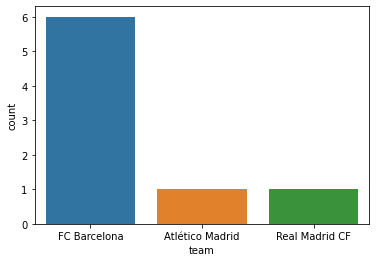

In [54]:
sns.countplot(df_win['team'][df_win['league']=='Spain LIGA BBVA'])

In [55]:
len(leagues)

11

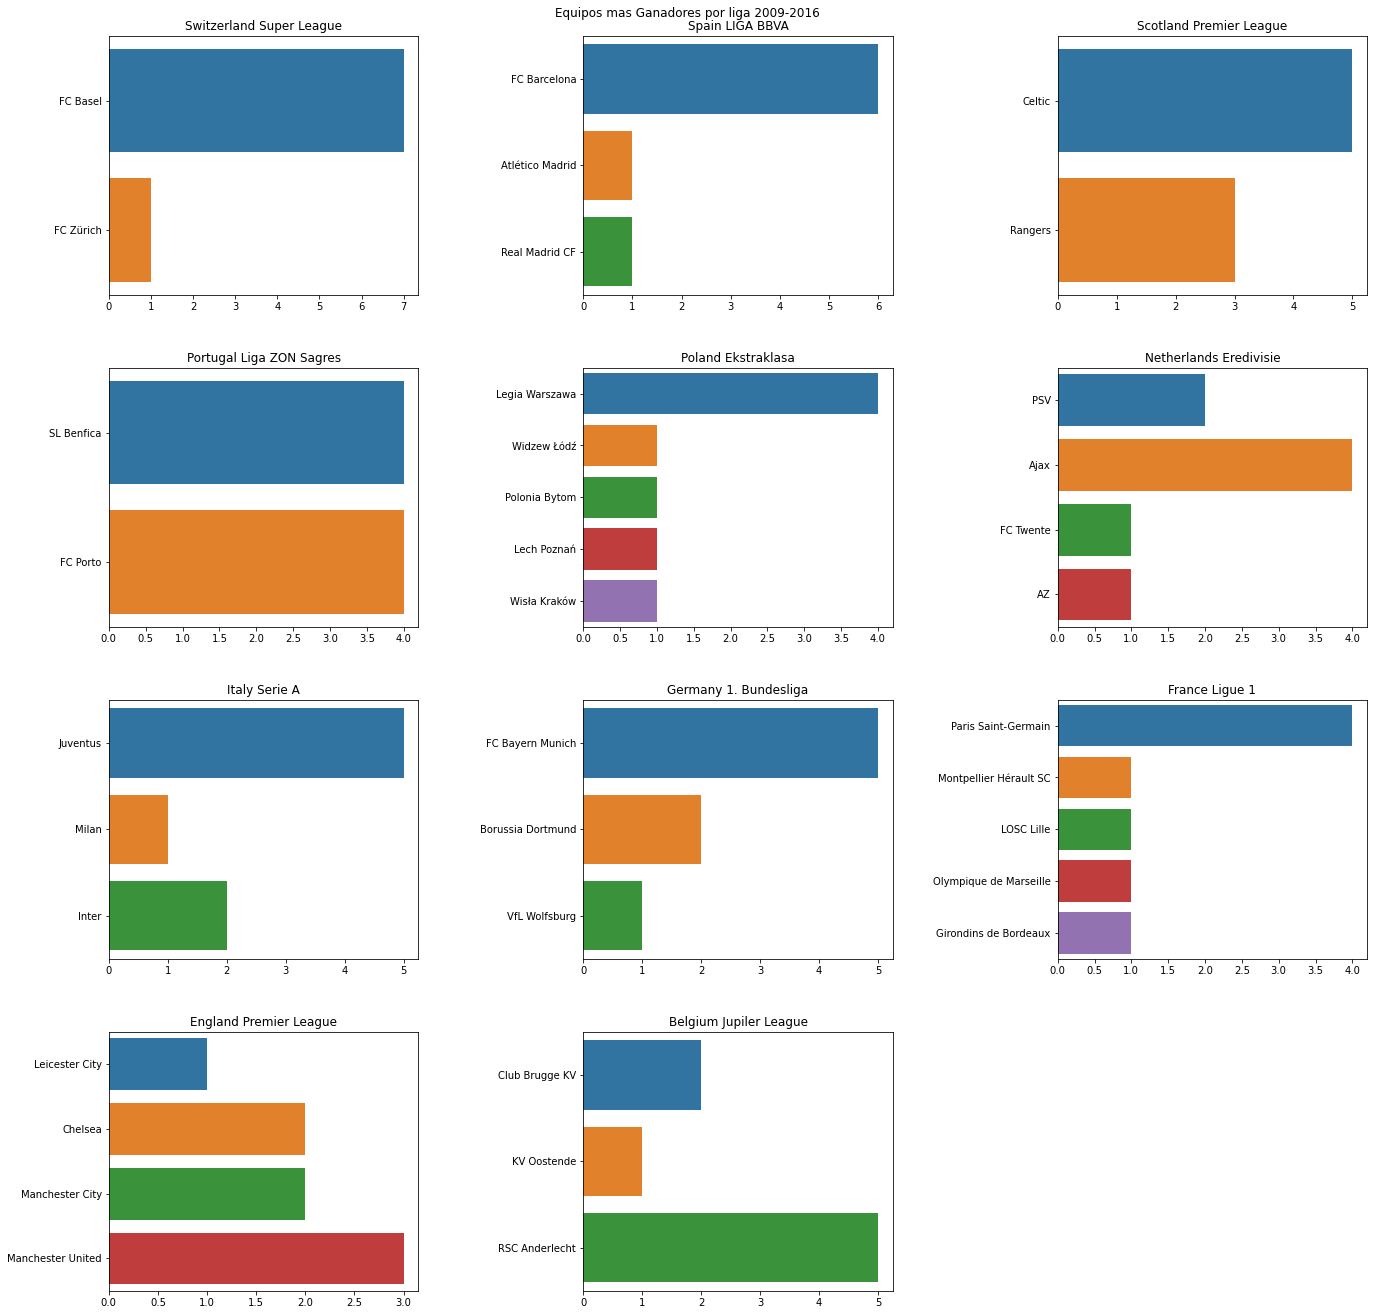

In [56]:
fig = plt.figure(figsize=(20,19))
for i in range(len(leagues)):
    ax = plt.subplot(4,3,i+1)
    sns.countplot(y=df_win['team'][df_win['league']==leagues[i]],ax=ax)
    ax.set(xlabel=None,ylabel=None)
    ax.set_title(leagues[i])
fig.tight_layout(pad=4.0)
fig.suptitle('Equipos mas Ganadores por liga 2009-2016')
plt.show()

### Definicion del campeonato

#### Analisis de con cuantas fechas de anticipacion se ha definido la liga en la temporada

In [57]:
data_final_season.head(5) 

,year,date,league,team,points,goals,location
0,2009,2008-08-17 00:00:00,Belgium Jupiler League,KRC Genk,1.0,0,home
1,2009,2008-08-16 00:00:00,Belgium Jupiler League,SV Zulte-Waregem,1.0,0,home
2,2009,2008-08-16 00:00:00,Belgium Jupiler League,KSV Cercle Brugge,0.0,-3,home
3,2009,2008-08-17 00:00:00,Belgium Jupiler League,KAA Gent,3.0,5,home
4,2009,2008-08-16 00:00:00,Belgium Jupiler League,FCV Dender EH,0.0,-2,home


In [58]:
# Se quiere agrupar las fechas de los partidos segun cada fecha de la temporada

In [59]:
#Lista de fechas de la liga belga temporada 2009
t_fechas = data_final_season[(data_final_season['year']==2009)&(data_final_season['league']=='Belgium Jupiler League')]['date'].sort_values().unique()

In [60]:
t_fechas = pd.to_datetime(t_fechas)

In [61]:
# Diferencia de dias entre los dias minimos con los demas dias
dif_days = np.absolute([(np.min(t_fechas)-i).days for i in t_fechas])

In [62]:
df_fechas = pd.DataFrame({
    'fechas' : t_fechas,
    'diferencia' : dif_days})

In [63]:
df_fechas

,fechas,diferencia
0,2008-08-16,0
1,2008-08-17,1
2,2008-08-23,7
3,2008-08-24,8
4,2008-08-29,13
...,...,...
91,2009-05-03,260
92,2009-05-08,265
93,2009-05-09,266
94,2009-05-15,272


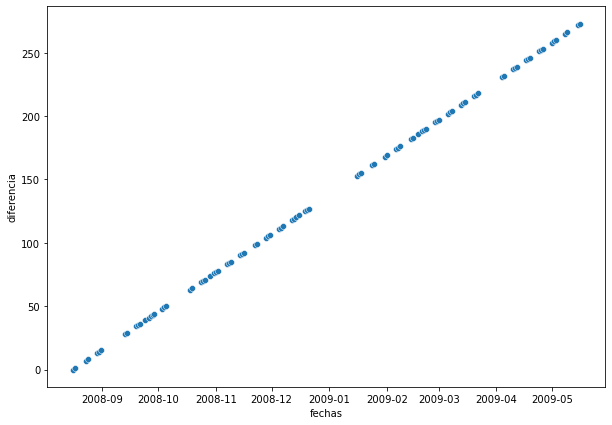

In [64]:
plt.figure(figsize=(10,7))
sns.scatterplot(df_fechas.fechas,df_fechas.diferencia)
plt.show()

#### Proceso de clustering